# Homework 01: LabinaShrestha

IMDB Dataset

In [2]:
#import necessary libraries
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.datasets import imdb

Using TensorFlow backend.


<b>Loading IMDB datataset(Data Preparation)<b>

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) 
#num_words = 10000 means it will keep the top 10,000 most frequently occuring words in the training data

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 #sets specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data) #vectorized training data
x_test = vectorize_sequences(test_data) #vactorized test data
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#setting aside a validation set 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

<b> Graph Visualization <b>

In [4]:
def plot(history):
    plt.figure(figsize = (10,5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label = 'Training loss')
    plt.plot(history['val_loss'], label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label = 'Training accuracy')
    plt.plot(history['val_accuracy'], label = 'Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()
    
    print('Maximum Training Accuracy:',max(history['accuracy']), 'Maximum Validation Accuracy', max(history['val_accuracy']))

<h3> Model-1 <h3>
<b> Building a model with 2 hidden layers, 16 Hidden Units (Textbook)<b>

In [49]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val),verbose = 0)

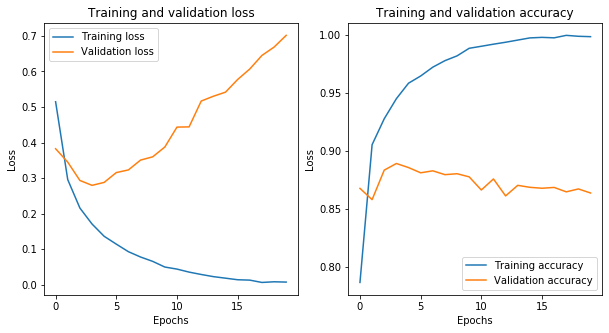

Maximum Training Accuracy: 0.99953336 Maximum Validation Accuracy 0.88919997215271
25000/25000 [==============================] - 1s 32us/step
Maximum test Accuracy: 0.8502399921417236


In [50]:
plot(history.history)
results = model.evaluate(x_test, y_test)
print('Maximum test Accuracy:', results[1])

<h3> Model-2<h3>
<b> Accuracy change while increasing Batch Size to 32 <b>
    

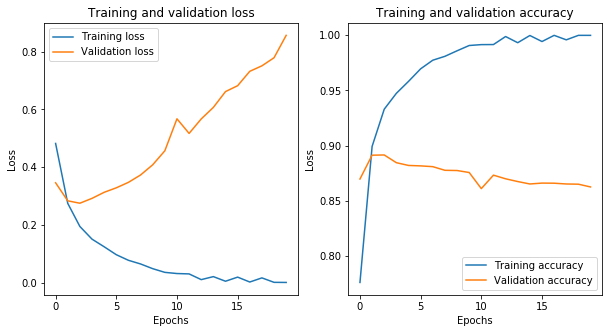

Maximum Training Accuracy: 0.99993336 Maximum Validation Accuracy 0.8914999961853027
25000/25000 [==============================] - 1s 40us/step
Maximum test Accuracy: 0.8442000150680542


In [52]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose = 0)

plot(history.history)
results = model.evaluate(x_test, y_test)
print('Maximum test Accuracy:', results[1])

 <h3> Model-3<h3>
 <b> Accuracy change while increasing Batch Size to 64 <b>

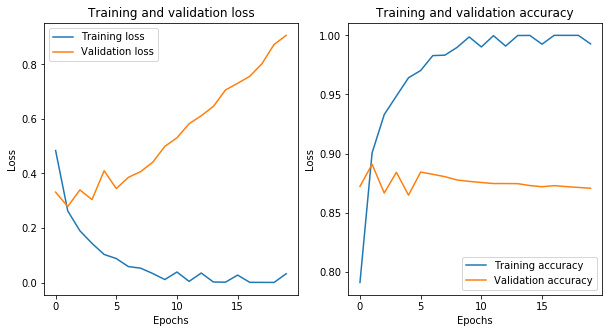

Maximum Training Accuracy: 1.0 Maximum Validation Accuracy 0.890999972820282
25000/25000 [==============================] - 1s 46us/step
Maximum test Accuracy: 0.8548799753189087


In [53]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose = 0)

plot(history.history)
results = model.evaluate(x_test, y_test)
print('Maximum test Accuracy:', results[1])

<h3> Model-4 <h3>
<b> Increasing hidden Layer to 3 with 64, hidden units <b>

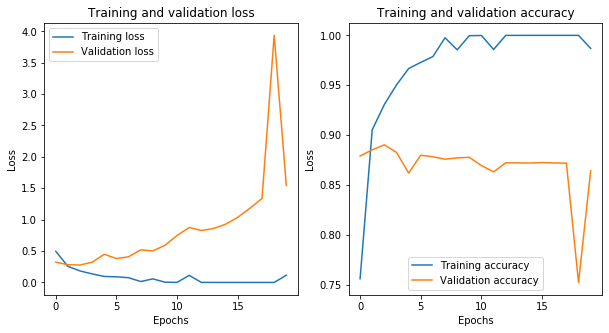

Maximum Training Accuracy: 1.0 Maximum Validation Accuracy 0.8902999758720398
25000/25000 [==============================] - 1s 48us/step
Maximum test Accuracy: 0.847760021686554


In [54]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose = 0)

plot(history.history)
results = model.evaluate(x_test, y_test)
print('Maximum test Accuracy:', results[1])

<h3> Model-5<h3>
<b> Increasing the Hidden layers to 4, we can see that it starts to overfit alot <b>

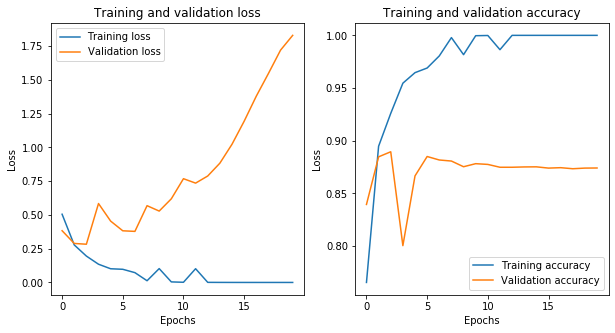

Maximum Training Accuracy: 1.0 Maximum Validation Accuracy 0.8895000219345093
25000/25000 [==============================] - 1s 49us/step
Maximum test Accuracy: 0.8580800294876099


In [55]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose = 0)

plot(history.history)
results = model.evaluate(x_test, y_test)
print('Maximum test Accuracy:', results[1])

<h3> Model-6<h3>
<b> Decreasing the Hidden layers to 2, and changing the loss function to 'mse' we can see that it also starts to overfit alot <b>

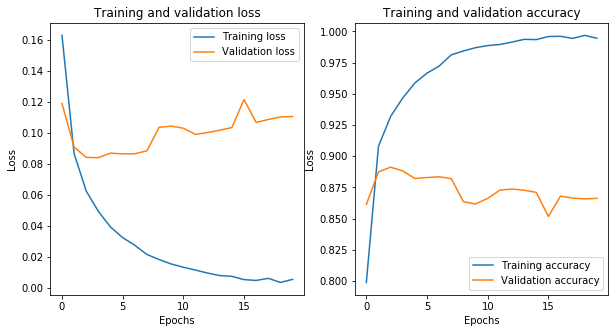

Maximum Training Accuracy: 0.99686664 Maximum Validation Accuracy 0.8912000060081482
25000/25000 [==============================] - 1s 39us/step
Maximum test Accuracy: 0.8513200283050537


In [56]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose = 0)

plot(history.history)
results = model.evaluate(x_test, y_test)
print('Maximum test Accuracy:', results[1])

<h3> Model -7 <h3>  
<b>Decreasing the learning rate and protect from overfitting the model and from the graph we can see that it has place to learn more if me train for more epochs<b>

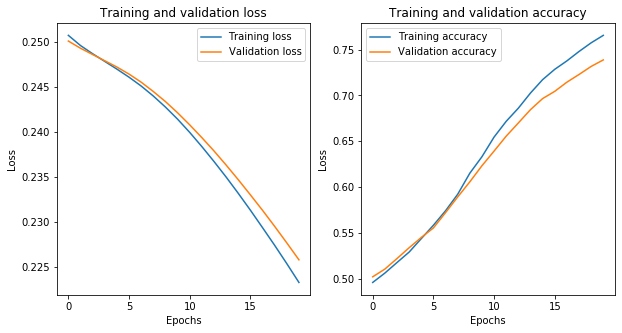

Maximum Training Accuracy: 0.7656 Maximum Validation Accuracy 0.7387999892234802
25000/25000 [==============================] - 1s 41us/step
Maximum test Accuracy: 0.7337599992752075


In [57]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer=keras.optimizers.rmsprop(lr=0.00001), loss='mse', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose = 0)

plot(history.history)
results = model.evaluate(x_test, y_test)
print('Maximum test Accuracy:', results[1])

<h3> Model-8 <h3> 
<b> Increasing the lerning rate, can result to overfitting<b>

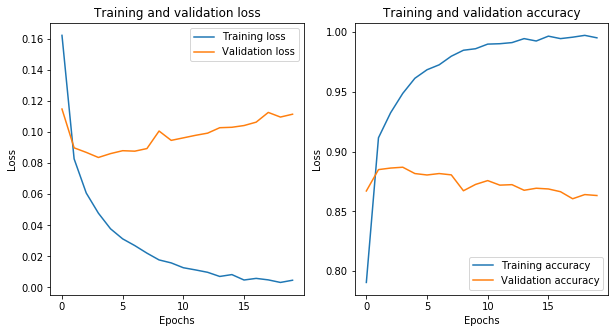

Maximum Training Accuracy: 0.9974 Maximum Validation Accuracy 0.8870000243186951
25000/25000 [==============================] - 1s 39us/step
Maximum test Accuracy: 0.8522800207138062


In [58]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer=keras.optimizers.rmsprop(lr=0.001), loss='mse', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose = 0)

plot(history.history)
results = model.evaluate(x_test, y_test)
print('Maximum test Accuracy:', results[1])

<h3> Model-9 <h3> 
<b> Decreasing the lerning rate and training for more epochs, we can see that it is improving. And we can assume that if we train for more epochs then we can get better results<b>

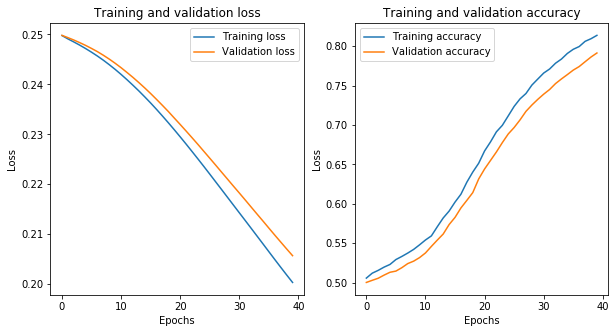

Maximum Training Accuracy: 0.81366664 Maximum Validation Accuracy 0.7912999987602234
25000/25000 [==============================] - 1s 30us/step
Maximum test Accuracy: 0.7769200205802917


In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer=keras.optimizers.rmsprop(lr=0.00001), loss='mse', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose = 0)

plot(history.history)
results = model.evaluate(x_test, y_test)
print('Maximum test Accuracy:', results[1])

<h3> Model-10 <h3> 
<b>since the loss is decreasing and the accuracy is increasing lets train for more epochs and check the performance<b>

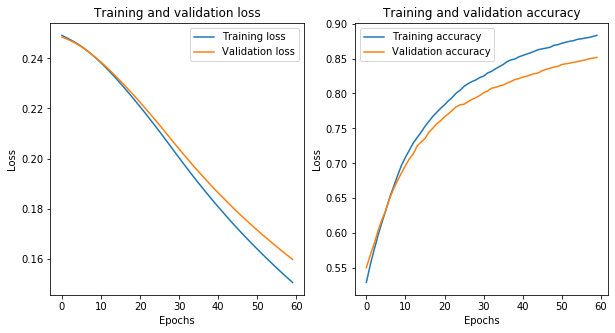

Maximum Training Accuracy: 0.88313335 Maximum Validation Accuracy 0.8515999913215637
25000/25000 [==============================] - 1s 31us/step
Maximum test Accuracy: 0.8446000218391418


In [8]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer=keras.optimizers.rmsprop(lr=0.00001), loss='mse', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=60, batch_size=512, validation_data=(x_val, y_val), verbose = 0)

plot(history.history)
results = model.evaluate(x_test, y_test)
print('Maximum test Accuracy:', results[1])

<h4> The performance is quite good and we can see there is no overfitting <h4>

<h3> Model-10 <h3> 
<b> Decreasing the learning rate and training for some more epochs again, we can see that it is improving. And we can assume that if we train for more epochs then we can get better results<b>

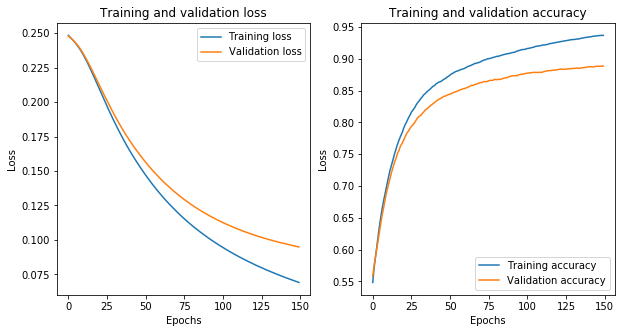

Maximum Training Accuracy: 0.9367333 Maximum Validation Accuracy 0.8885999917984009
25000/25000 [==============================] - 1s 32us/step
Maximum test Accuracy: 0.8792399764060974


In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer=keras.optimizers.rmsprop(lr=0.00001), loss='mse', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=150, batch_size=512, validation_data=(x_val, y_val), verbose = 0)

plot(history.history)
results = model.evaluate(x_test, y_test)
print('Maximum test Accuracy:', results[1])

<h4> The model is showing quite good accuracy <h4>

<h3> Model-11 <h3> 
<b> Increasing the learning rate training for some more epochs again, we can see that it is improving. And we can assume that if we train for 15 epochs<b>

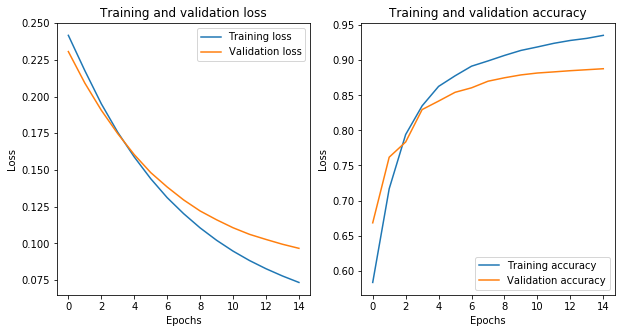

Maximum Training Accuracy: 0.93546665 Maximum Validation Accuracy 0.8878999948501587
25000/25000 [==============================] - 1s 33us/step
Maximum test Accuracy: 0.8790799975395203


In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer=keras.optimizers.rmsprop(lr=0.0001), loss='mse', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=15, batch_size=512, validation_data=(x_val, y_val), verbose = 0)

plot(history.history)
results = model.evaluate(x_test, y_test)
print('Maximum test Accuracy:', results[1])

<h3> Model-12 <h3> 
<b> Using tanh activation function<b>

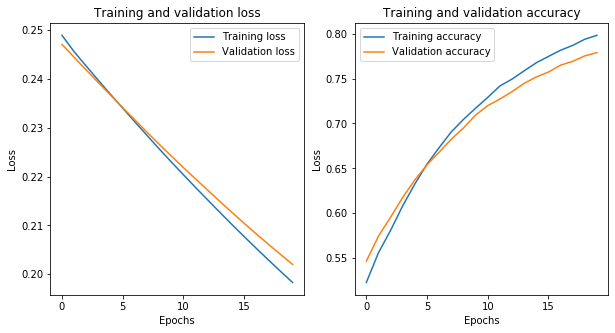

Maximum Training Accuracy: 0.7980667 Maximum Validation Accuracy 0.7788000106811523
25000/25000 [==============================] - 1s 41us/step
Maximum test Accuracy: 0.7720800042152405


In [59]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer=keras.optimizers.rmsprop(lr=0.00001), loss='mse', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose = 0)

plot(history.history)
results = model.evaluate(x_test, y_test)
print('Maximum test Accuracy:', results[1])

<h3> Model -13 <h3>
<b> using just 1 shallow layer <b>

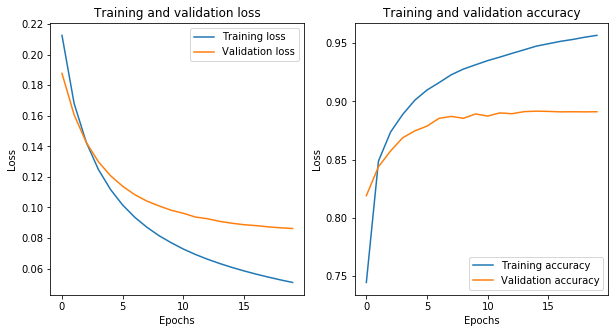

Maximum Training Accuracy: 0.95666665 Maximum Validation Accuracy 0.8916000127792358
25000/25000 [==============================] - 1s 38us/step
Maximum test Accuracy: 0.8839200139045715


In [60]:
model = models.Sequential()
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer=keras.optimizers.rmsprop(lr=0.001), loss='mse', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose = 0)

plot(history.history)
results = model.evaluate(x_test, y_test)
print('Maximum test Accuracy:', results[1])